In [2]:
import requests
url = "https://www.openml.org/data/download/22102255/dataset"
r = requests.get(url, allow_redirects=True)

In [3]:
with open("dataset.txt", "wb") as f:
    f.write(r.content)

In [4]:
import pandas as pd

In [5]:
data = []

with open("dataset.txt","r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line =="":
            continue
        data.append(line)

In [6]:
columns = []

with open("dataset.txt", "r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [7]:
with open("df.csv", "w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(data))

In [8]:
df = pd.read_csv("df.csv")
df.columns = columns

In [9]:
df["t_win"] = df.round_winner.astype("category").cat.codes

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations = df[columns+['t_win']].corr(numeric_only=True)
print(correlations['t_win'].apply(abs).sort_values(ascending=False).iloc[:25])

selected_columns = []

for col in columns+['t_win']:
    try:
        if abs(correlations[col]['t_win']) > 0.15:
            selected_columns.append(col)
    except KeyError:
        pass

df_selected = df[selected_columns]
df_selected

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,False,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


0.18710090782092895


<Axes: >

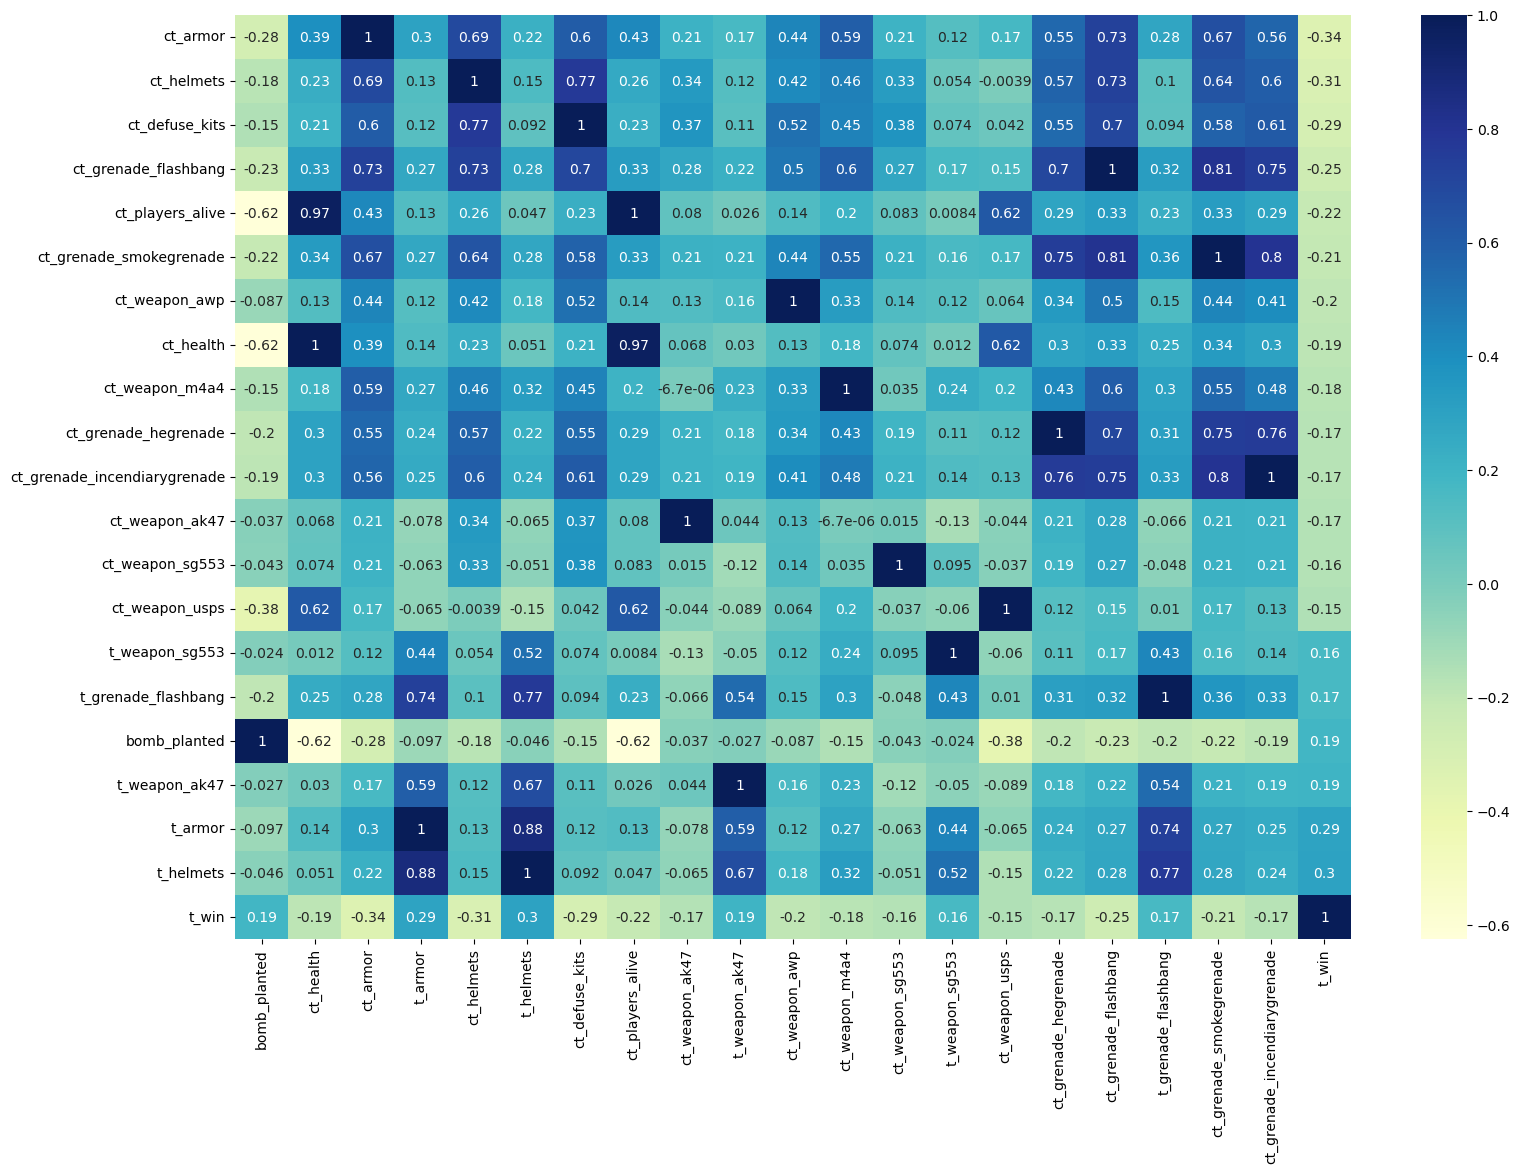

In [11]:
print(correlations['bomb_planted']['t_win'])

plt.figure(figsize=(18, 12))
sns.heatmap(df_selected.corr().sort_values(by='t_win'), annot=True, cmap='YlGnBu')

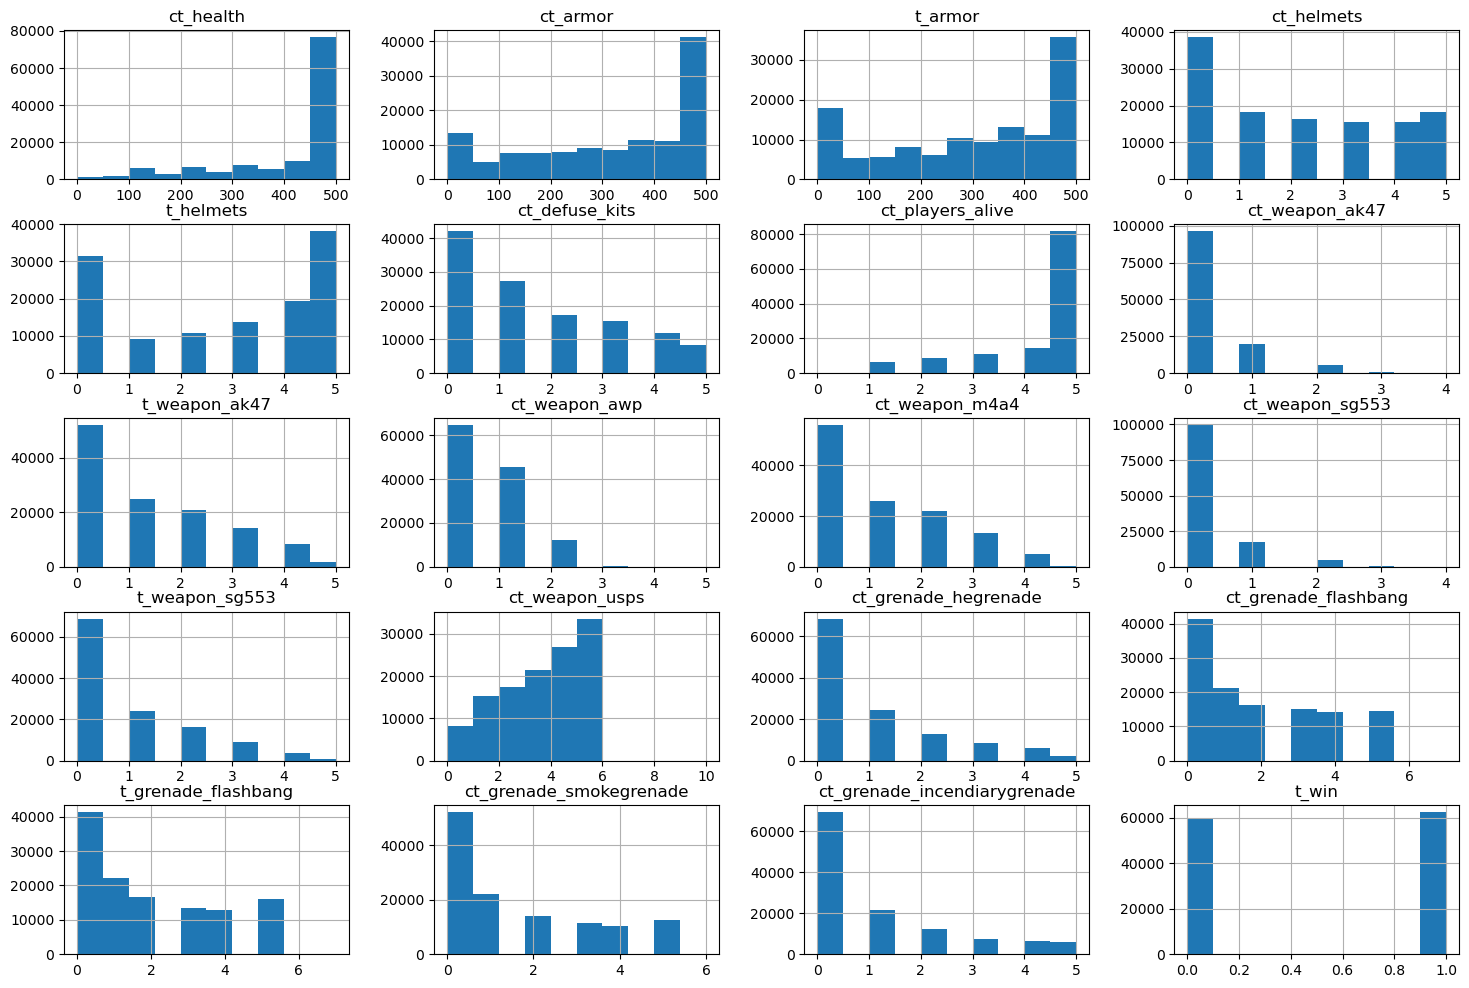

In [12]:
df_selected.hist(figsize=(18, 12))
plt.savefig("histograma.png")

In [13]:
from sklearn.model_selection import train_test_split

X, y = df_selected.drop(['t_win'], axis=1), df_selected['t_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [15]:
knn.score(X_test_scaled, y_test)

0.7673392696675109

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = { 
    "n_neighbors":list(range(5,17,2)),
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier(n_jobs=-1)

clf = RandomizedSearchCV(knn, param_grid, n_jobs=-1, n_iter=3, verbose=2, cv=3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [17]:
clf.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=15, weights='distance')

In [18]:
clf.best_estimator_.score(X_test_scaled, y_test)

0.7835961114288048

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=-1)

forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [20]:
forest.score(X_train, y_train)

0.9684155706233151

In [21]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)

model.fit(X_train_scaled_train, y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 4s 889us/step - accuracy: 0.7349 - loss: 0.4896 - val_accuracy: 0.7402 - val_loss: 0.4789
Epoch 2/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.7496 - loss: 0.4703 - val_accuracy: 0.7496 - val_loss: 0.4687
Epoch 3/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - accuracy: 0.7522 - loss: 0.4649 - val_accuracy: 0.7464 - val_loss: 0.4684
Epoch 4/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.7535 - loss: 0.4601 - val_accuracy: 0.7480 - val_loss: 0.4682
Epoch 5/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.7556 - loss: 0.4624 - val_accuracy: 0.7457 - val_loss: 0.4663
Epoch 6/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.7589 - loss: 0.4569 - val_accuracy: 0.7526 - val_loss: 0.4651
Epoch 7/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.7595 - loss: 0.4532 - val_accuracy: 0.7496 - val_loss: 0.4638
Epoch 8/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.7584 -

In [49]:
model.evaluate(X_test_scaled, y_test)

766/766 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.7567 - loss: 0.4649


[0.46227219700813293, 0.7556571960449219]

In [51]:
model.save("200_100_100_csgo.h5")

In [53]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [55]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30)

X_train_scaled_train, X_valid, y_train_train, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.15)


model.fit(X_train_scaled_train, y_train_train, epochs=50, callbacks=[early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.7687 - loss: 0.4389 - val_accuracy: 0.7778 - val_loss: 0.4380
Epoch 2/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 640us/step - accuracy: 0.7728 - loss: 0.4380 - val_accuracy: 0.7731 - val_loss: 0.4377
Epoch 3/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.7702 - loss: 0.4388 - val_accuracy: 0.7730 - val_loss: 0.4395
Epoch 4/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 637us/step - accuracy: 0.7742 - loss: 0.4344 - val_accuracy: 0.7721 - val_loss: 0.4395
Epoch 5/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 644us/step - accuracy: 0.7741 - loss: 0.4365 - val_accuracy: 0.7668 - val_loss: 0.4437
Epoch 6/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 633us/step - accuracy: 0.7717 - loss: 0.4376 - val_accuracy: 0.7747 - val_loss: 0.4399
Epoch 7/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - accuracy: 0.7743 - loss: 0.4341 - val_accuracy: 0.7753 - val_loss: 0.4412
Epoch 8/50
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 2s 640us/step - accuracy: 0.7744 -

In [65]:
model.evaluate(X_test_scaled, y_test)

766/766 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.7493 - loss: 0.4701


[0.4686655104160309, 0.7489175796508789]